In [594]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import Convolution2D, Flatten, MaxPooling2D, Dense, Activation, Dropout
from keras.optimizers import Adam
from keras import optimizers
from keras.utils import np_utils

import matplotlib.pyplot as plt
import matplotlib.image as processimage
import os
from PIL import Image
import random

import tensorflow as tf

In [595]:
#'fig/fig/num3.png'
img = Image.open('fig/fig/num3.png')
img_arr = np.array(img)
print(img_arr.shape)

(223, 180, 3)


In [596]:
def pic_resize(filepath,width,height,savepath):
    img_open = Image.open(filepath)
    conv_RGB = img_open.convert('RGB')
    resized_img = conv_RGB.resize((width,height),Image.BILINEAR)
    resized_img.save(savepath)
    
pic_resize('fig/fig/num3.png',28,28,'fig/fig/num3_resize.png')

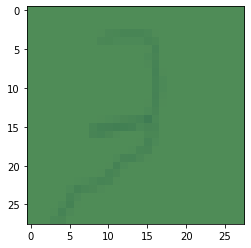

In [597]:
color_weight = [1.00,0.95,0.85,0.75,0.65]
img = Image.open('fig/fig/num3_resize.png')
img_arr = np.array(img)
for color in color_weight:
    for depth in range(3):
        random_depth = random.randint(0,2)
        for col in range(28):
            for row in range(28):
                img_arr[row,col,random_depth] = img_arr[row,col,random_depth] * color
    #print(img_arr)
    im = Image.fromarray(img_arr)
    path = 'fig/'+'num3_resize_color' + str(color) +'.png'
    im.save(path)
    plt.imshow(img_arr)

In [598]:
color_weight = [1.00,0.95,0.85,0.75,0.65]
for num in range (0,10):
    dir_path = 'fig/fig/train/num'
    folder_path = dir_path + str(num) + '/train_num' + str(num) + '_'
    for num_img in range(0,5):
        img_path = folder_path + str(num_img) + '.png'
        resized_path = folder_path + str(num_img) + 'resized' + '.png'
        pic_resize(img_path,28,28,resized_path)

In [599]:
color_weight = [1.00,0.95,0.85,0.75,0.65]
print(min(color_weight))

0.65


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  12  60  12   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  24 133
  230 255 255 194  24   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  85 230 157
   48  24  36 145   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  36 182 218  48   0
    0   0 170  97   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  12 133 242 242 121  12   0   0
    0   0 206  12   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 218 145  36   0   0   0   0   0
    0  12 206   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 157 206   0   0   0   0   

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  22
   33   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  66
  255  55   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   88  44   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   33 144  22   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0  66  88   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0  22 133   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 133  11   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 136  49   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  99  87   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  24  99   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  99  36   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  49  61   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  24  87   

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   7  43  77  68  34   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  51 111  59  43  68  5

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   9  63
  100 109 100  18   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  18  63
   36  36  63  81   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  18 100   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  27  91   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   9 109   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  10  30   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  10 126 104
   20   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  10  73
  126  10   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   62 126  20   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0  73  94   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0  10 104   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0  85 121  60  24   0   0   0   0   0   0   0   0   0   

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 106  96  58
   19   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  67 136  58  58  87
  126 136 117  38   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  87 126  19   0   0   0
    0   9 146 106   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  67 117   9   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 117  19   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 126   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  29  96   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  67  67   0   0   0   

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   8  26  26   8
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  35 116  98  98  98
   89  71  44   8   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  62 116  35   0   0   8
   26  44 134 143   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  80  98   8   0   0   0   0
    0   0   0   8   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   8 116   8   0   0   

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  46  18   0   0   

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  28  71   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  42 128  99 142  99  28   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  28 128  28  14 142 128 185   

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  26  66   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  39 118  92 132  92  26   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  26 118  26  13 132 118 171   

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  18  46  64  83  83  83  83
   83  83  83  83  27   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  74 167 232 157 120 111 101  93  93
   74  74  74  93  46   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 120 111  64 186 101 120 120 130 139 167
   64   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 111  74   0   8 120  27   0   0   0   0  93
   83   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   8  74 130   0   0   0  93  64   0   0   

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  16  43  59  77  77  77  77
   77  77  77  77  25   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  68 154 215 146 111 102  94  86  86
   68  68  68  86  43   0   0   0   0   0]
 [  0   0   0   0   0   0   0  16 111 102  59 172  94 111 111 120 129 154
   59   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 102  68   0   7 111  25   0   0   0   0  86
   77   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   7  68 120   0   0   0  86  59   0   0   

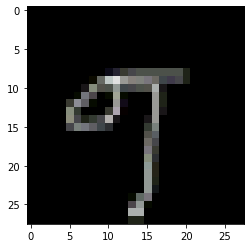

In [600]:
train_label = []
train_imgs = []
color_weight = [1.00,0.95,0.90,0.91,0.88]
for num in range (0,10):
    dir_path = 'fig/fig/train/num'
    folder_path = dir_path + str(num) + '/train_num' + str(num) + '_'
    for num_img in range(0,5):
        resized_path = folder_path + str(num_img) + 'resized' + '.png'
        img = Image.open(resized_path)
        img_arr = np.array(img)
        for color in color_weight:
            for depth in range(3):
                #random_depth = random.randint(0,2)
                #for col in range(28):
                    #for row in range(28):
                        #img_arr[row,col,depth] = (float(img_arr[row,col,depth]) - min(img_arr)) * max(img_arr) / 255.0
                        #img_arr[row,col,depth] =  float(img_arr[row,col,depth] * color)
                img_arr[:,:,depth] = 255 - (img_arr[:,:,depth] - img_arr[:,:,depth].min()) * 255.0 /(img_arr[:,:,depth].max() - img_arr[:,:,depth].min()) 
                img_arr[:,:,depth] = img_arr[:,:,depth] * color 
                #print(img_arr) Be careful about the multiple subsctraction
            train_label.append(num)
            train_imgs.append(img_arr)
            im = Image.fromarray(img_arr)
            path = folder_path + str(num_img) + 'resized' + str(color) +'.png'
            im.save(path)
            plt.imshow(img_arr)
            print(img_arr[:,:,1])
            img_arr = np.array(img)

In [601]:
# load mnist dataset
# only use the first 100 labels
(data_train,label_train),(data_test,label_test) = mnist.load_data()
data_train_arr = np.array(data_train[0:200])
data_train_arr = np.expand_dims(data_train_arr[0:200],axis = 3)
label_train_arr = np.array(label_train[0:200])
print(data_train_arr.shape)
print(label_train_arr.shape)

for index in range(200):
    data = np.dstack((data_train_arr[index],data_train_arr[index],data_train_arr[index]))
    im_mnist = Image.fromarray(data)
    train_imgs.append(data)
    train_label.append(label_train_arr[index])
    path = 'C:\\Users\\ltopuser\\Desktop\\BEng\\fig\\fig\\' +  str(label_train_arr[index]) + '_' + str(index) +'.png'
    im_mnist.save(path)
# for index in range(200):
#     #plt.imshow(data_train_arr[index])
#     im_mnist = Image.fromarray(data_train_arr[index])
#     path = 'C:\\Users\\ltopuser\\Desktop\\BEng\\fig\\fig\\mnist' + 'num' + str(label_train_arr[index]) + '_' + str(index) +'.png'
#     im_mnist.save(path)

(200, 28, 28, 1)
(200,)


In [602]:
train_label = np.array(train_label)
train_imgs = np.array(train_imgs)
print(train_imgs.shape)


(450, 28, 28, 3)


9
(450,)


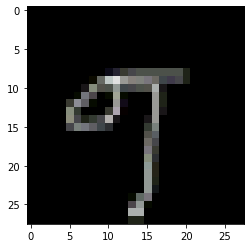

In [603]:
plt.imshow(train_imgs[234])
print(train_label[234])
print(train_label.shape)
#print(train_imgs[300,:,:,0])

In [604]:
model = Sequential()

model.add(Convolution2D(
        input_shape = (28,28,3),
        filters = 32,
        kernel_size = (3,3),
        padding = 'same'))
model.add(Activation('relu'))
#model.add(Dropout(0.5))
model.add(MaxPooling2D(
    pool_size=(2,2),
    strides=(2,2),
    padding = 'same'
))


model.add(Convolution2D(
        filters = 128,
        kernel_size = (3,3),
        padding = 'same'))
model.add(Activation('relu'))
#model.add(Dropout(0.5))
model.add(MaxPooling2D(
    pool_size=(2,2),
    strides=(2,2),
    padding = 'same'
))


model.add(Convolution2D(
        filters = 128,
        kernel_size = (3,3),
        padding = 'same'))
model.add(Activation('relu'))
#model.add(Dropout(0.5))
model.add(MaxPooling2D(
    pool_size=(2,2),
    strides=(2,2),
    padding = 'same'
))

model.add(Convolution2D(
        filters = 128,
        kernel_size = (3,3),
        padding = 'same'))
model.add(Activation('relu'))
#model.add(Dropout(0.5))
model.add(MaxPooling2D(
    pool_size=(2,2),
    strides=(2,2),
    padding = 'same'
))


model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

In [605]:
adam = Adam(lr = 0.0001)
sgd = optimizers.SGD(lr = 0.0001, momentum = 0.1, decay = 0.0, nesterov = False)
model.compile(
    loss = 'categorical_crossentropy',  #define the loss function
    optimizer = adam,
    metrics = ['accuracy']
)

train_label = np_utils.to_categorical(train_label,10)

In [606]:
# predefine the para for the network
batch_size = 50
num_of_class = 10
num_of_epochs = 100

#start the network
Tranning = model.fit(
    train_imgs,
    train_label,
    validation_split = 0.2,
    batch_size = batch_size,
    epochs = num_of_epochs,
)

Epoch 1/100
8/8 [==============================] - 2s 124ms/step - loss: 6.9806 - accuracy: 0.2028 - val_loss: 6.1018 - val_accuracy: 0.1778
Epoch 2/100
8/8 [==============================] - 1s 92ms/step - loss: 2.8409 - accuracy: 0.4642 - val_loss: 3.5593 - val_accuracy: 0.3333
Epoch 3/100
8/8 [==============================] - 1s 94ms/step - loss: 0.9654 - accuracy: 0.7727 - val_loss: 3.0225 - val_accuracy: 0.3778
Epoch 4/100
8/8 [==============================] - 1s 90ms/step - loss: 0.5157 - accuracy: 0.8825 - val_loss: 1.5137 - val_accuracy: 0.5889
Epoch 5/100
8/8 [==============================] - 1s 92ms/step - loss: 0.2270 - accuracy: 0.9565 - val_loss: 1.3669 - val_accuracy: 0.6222
Epoch 6/100
8/8 [==============================] - 1s 99ms/step - loss: 0.1030 - accuracy: 0.9841 - val_loss: 1.2840 - val_accuracy: 0.6333
Epoch 7/100
8/8 [==============================] - 1s 98ms/step - loss: 0.0448 - accuracy: 1.0000 - val_loss: 1.1338 - val_accuracy: 0.6556
Epoch 8/100
8/8 [==

Epoch 59/100
8/8 [==============================] - 1s 88ms/step - loss: 5.0359e-04 - accuracy: 1.0000 - val_loss: 1.0157 - val_accuracy: 0.7778
Epoch 60/100
8/8 [==============================] - 1s 87ms/step - loss: 4.8746e-04 - accuracy: 1.0000 - val_loss: 1.0145 - val_accuracy: 0.7889
Epoch 61/100
8/8 [==============================] - 1s 87ms/step - loss: 5.0062e-04 - accuracy: 1.0000 - val_loss: 1.0247 - val_accuracy: 0.7778
Epoch 62/100
8/8 [==============================] - 1s 88ms/step - loss: 4.4490e-04 - accuracy: 1.0000 - val_loss: 1.0211 - val_accuracy: 0.7778
Epoch 63/100
8/8 [==============================] - 1s 85ms/step - loss: 4.4984e-04 - accuracy: 1.0000 - val_loss: 1.0386 - val_accuracy: 0.7778
Epoch 64/100
8/8 [==============================] - 1s 88ms/step - loss: 4.2157e-04 - accuracy: 1.0000 - val_loss: 1.0254 - val_accuracy: 0.7778
Epoch 65/100
8/8 [==============================] - 1s 86ms/step - loss: 4.1610e-04 - accuracy: 1.0000 - val_loss: 1.0270 - val_ac

(231, 212, 3)
(28, 28, 3)
[[3.8979283e-06 3.3411950e-06 8.7605957e-07 5.9279164e-06 1.4013077e-05
  1.6785620e-05 1.3343110e-06 5.8101981e-05 1.1746132e-05 9.9988401e-01]]
(array([0], dtype=int64), array([9], dtype=int64))


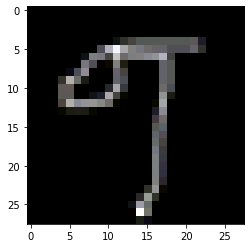

In [620]:
#then test the model
img = Image.open('C:\\Users\\ltopuser\\Desktop\\BEng\\fig\\fig\\origin\\num9.png')
img_arr = np.array(img)
print(img_arr.shape)
conv_RGB = img.convert('RGB')
resized_img = conv_RGB.resize((28,28),Image.BILINEAR)
resized_img_array = np.array(resized_img)
print(resized_img_array.shape)

for depth in range(3):
    resized_img_array[:,:,depth] = 255 - (resized_img_array[:,:,depth] - resized_img_array[:,:,depth].min()) * 255.0 /(resized_img_array[:,:,depth].max() - resized_img_array[:,:,depth].min()) 

plt.imshow(resized_img_array)
test_img = Image.fromarray(resized_img_array)
path = 'C:\\Users\\ltopuser\\Desktop\\BEng\\fig\\fig\\phone\\' +  '9' + '_' + 'test' +'.png'
test_img.save(path)
test_input = np.expand_dims(resized_img_array,axis = 0)
pred = model.predict(test_input)
print(pred)
print(np.where(pred==np.max(pred)))

In [608]:
model.save('./num_three_channel.h5')
print(tf.__version__)

2.4.1


In [609]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.post_training_quantize = True
tflitemodel = converter.convert()
open("num_mobile_three_channel.tflite","wb").write(tflitemodel)

INFO:tensorflow:Assets written to: C:\Users\ltopuser\AppData\Local\Temp\tmpgr0m_ysk\assets


5558524